# **NLP Language Model on EM Questions Dataset**

Dataset : https://drive.google.com/file/d/1ayVNWiel4BWlsNpna2elo6yFteFNVv_E/view?usp=sharing

*Key features* about the data :

1. Unlabelled Data
2. Preprocessing has been done

---

**Objective** 

`Trying some simple statistical nlp models on the dataset to make some observations`.

---

**Background**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip "drive/MyDrive/Quora-QnA/quora-question-pairs" -d "quora-question-pairs"
# !unzip "quora-question-pairs/train.csv.zip"
# !unzip "quora-question-pairs/test.csv.zip"
# df = pd.read_csv("train.csv")

In [5]:
df = pd.read_csv("drive/MyDrive/Extramarks Project/Week2/clean_data(untokenized).csv", low_memory=False)

In [6]:
df

,Unnamed: 0,question,syllabus_id
0,0,Total number of species that can be oxidized b...,698013
1,1,How many following Ammonium salts will evolve ...,698013
2,2,There are some species given below i O2 ii CO ...,697895
3,3,Consider the following compounds 1 H3CF 2 H2CF...,697895
4,4,Find total number of reagents which can produc...,698013
...,...,...,...
276442,276442,question subjective english,-1
276443,276443,subjective english questions,-1
276444,276444,What are the 5 English questions,-1
276445,276445,test,-1


In [7]:
df = df.drop(['Unnamed: 0'], axis = 1)    # Dropped the id_column

In [8]:
print("Number of Questions :", df.shape[0])
print(df.shape)

Number of Questions : 276447
(276447, 2)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276447 entries, 0 to 276446
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   question     275951 non-null  object
 1   syllabus_id  276447 non-null  object
dtypes: object(2)
memory usage: 4.2+ MB


In [10]:
df.isnull().sum()

question       496
syllabus_id      0
dtype: int64

> There are few `missing values` in the *question* column.

- Can remove these few rows since the data is large enough or can think of other ways as well.

In [11]:
# Dropping the Null values rows
df = df.dropna()
print(df.shape)

(275951, 2)


In [12]:
df["question"] = df["question"].str.lower()

##### **FEATURE ENGINEERING ON THE DATASET**

- Character length of a question
- Number of words in a question
- Number of common words in both questions
- Total unique words in both questions
- Word share ( Jaccard similarity )

In [13]:
# Character length of a question

df["len"] = df["question"].str.len()


In [14]:
# Number of words
df["word"] = df["question"].str.strip().str.split().str.len()

In [15]:
# Number of common words

def to_lower(d):
  a = [[x.lower() for x in s] for s in d]
  return a 

def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1 |w2))

In [16]:
df.head()

,question,syllabus_id,len,word
0,total number of species that can be oxidized b...,698013,117,23
1,how many following ammonium salts will evolve ...,698013,122,22
2,there are some species given below i o2 ii co ...,697895,156,34
3,consider the following compounds 1 h3cf 2 h2cf...,697895,299,65
4,find total number of reagents which can produc...,698013,190,37


In [17]:
# df['word_share'] = round(df['common_words']/df['word_total'],2)
# df.head()

Minimum characters 2
Maximum characters 445077
Average number of characters 143


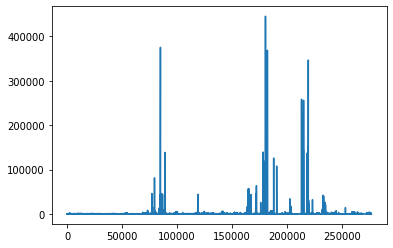

In [18]:
# Question lengths statistics

# sns.displot(df['len'])
print('Minimum characters',df['len'].min())
print('Maximum characters',df['len'].max())
print('Average number of characters',int(df['len'].mean()))
df['len'].plot()

In [19]:
df.loc[df['len'] <= 5]

,question,syllabus_id,len,word
663,zn,700295,3,1
11768,96 3,698368,5,2
11807,1 i,698536,4,2
11916,i 39,698536,5,2
12236,i,698536,2,1
...,...,...,...,...
276386,i,-1,2,1
276388,f,-1,2,1
276389,test,-1,5,1
276434,kjkj,-1,5,1


In [20]:
# df.loc[df['len'] >= 10000]

# Observation : It's because of image links which are quite big

In [21]:
# Removing rows where questions len <= 5 (open for suggestion)

df = df.drop(df.loc[df['len'] <= 5].index)

In [22]:
# df = df.drop(df.loc[df['question1'] == 'deleted'].index)
# df = df.drop(df.loc[df['question2'] == 'deleted'].index)
# df = df.drop(df.loc[df['question1'] == 'deleted.'].index)
# df = df.drop(df.loc[df['question2'] == 'deleted.'].index)
# df = df.drop(df.loc[df['question1'] == 'delete'].index)
# df = df.drop(df.loc[df['question2'] == 'delete'].index)
# df = df.drop(df.loc[df['question1'] == '[removed]'].index)
# df = df.drop(df.loc[df['question2'] == '[removed]'].index)

df.shape

(275833, 4)

Minimum words 1
Maximum words 13954
Average num of words 26


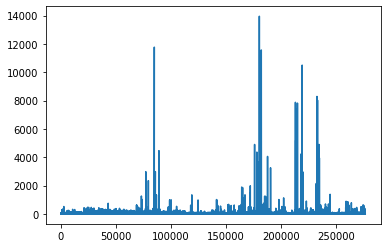

In [23]:
df['word'].plot()
print('Minimum words',df['word'].min())
print('Maximum words',df['word'].max())
print('Average num of words',int(df['word'].mean()))

In [24]:
df.loc[df['word'] <= 1]

,question,syllabus_id,len,word
9808,solve,701164,6,1
9812,02exdx,539443,7,1
10104,solve,701164,6,1
10310,tan2xsec4xdx,539443,13,1
10437,solve,701164,6,1
...,...,...,...,...
276361,tsest,-1,6,1
276373,hello,-1,6,1
276378,question,-1,9,1
276422,quesion,-1,8,1


In [25]:
# Questions with words = 1 Are they of any use, seems useful ?

df.loc[df['word'] == 2]

,question,syllabus_id,len,word
553,biosphere is,697984,13,2
704,trisilyamine sih33nis,698013,22,2
1918,verdigris is,700295,13,2
3504,associated colloids,700206,20,2
3786,peptization involves,700206,21,2
...,...,...,...,...
276408,subjective englishkajhsdklf,-1,28,2
276423,subjective englishkajhsdklf,-1,28,2
276424,subjective englishkajhsdklf,-1,28,2
276426,subjective englishkajhsdklf,-1,28,2


### **Word share / Jaccard Similarity Plot**

### **PRE-PROCESSING FOR THE NLP MODEL**

In [26]:
ques = df['question'].tolist()
ques[:10] 

['total number of species that can be oxidized by acidic permanganate ion mno4 h i fe2 co2 c2o42 s2 so32 no2 po43 so42 ',
 'how many following ammonium salts will evolve n2 gas on heating nh4 2co3 nh4 2cr2o7 nh4no2 nh4clo4 nh4cl nh4 2s nh4 2c2o4 ',
 'there are some species given below i o2 ii co iii b2 iv o2 v no vi he2 vii c22 viii cn ix n2 total number of species which have their fractional bond order ',
 'consider the following compounds 1 h3cf 2 h2cf2 3 ch4 4 h3ccf3 5 ch3c h3 6 c2h4 and calculate value of y x where x is the total number of compounds which have h c h bond angles equal to 109 28 and y is the total number of compounds which have h c h bond angles greater than 109 28 and less than 120 ',
 'find total number of reagents which can produce i2 from ki solution conc h2so4 hg no3 2 solution cuso4 solution conc h3po4 k2cr2o7 h cl2 water pb ch3coo 2 solution ca ocl cl h nano2 dil hcl ',
 'find out maximum number of carbon atom s that can lie in a plane in fedmg2 ',
 'consider 

In [31]:
import nltk
from nltk import bigrams, trigrams, word_tokenize
from collections import Counter, defaultdict
from collections import OrderedDict
import operator

In [32]:
def Unigram_distr(dataset):
  model = defaultdict(lambda : 0)
  total_count = 0 
  for sentence in dataset:
    sentence = nltk.word_tokenize(sentence)
    for w1 in sentence:
      model[w1] += 1
      total_count += 1 ;
  for w1 in model:
      model[w1] /= total_count
  return model

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
Unigram_model = Unigram_distr(ques)

In [35]:
w1 = 'i' 
Unigram_model[w1]  #Probabilty of w1 occuring 

0.009132285938421155

In [36]:
def sort_dict_by_value(cont):

  sorted_tuples = sorted(cont.items(), key=operator.itemgetter(1), reverse = True)

  sorted_dict = OrderedDict()
  for k, v in sorted_tuples:
    sorted_dict[k] = v
  return sorted_dict

In [37]:
def plot_bar_plot(sorted_choices,k,gram,w=''):

  num = min(k,len(sorted_choices))   # Top `num` words with highest probabilty to be shown
  top_choices = OrderedDict(list(sorted_choices.items())[0: num]) 

  words = list(top_choices.keys())
  probabs = list(top_choices.values())

  fig, ax = plt.subplots()

  bars = ax.bar( range(num), probabs , tick_label = words )

  plt.xticks(rotation = 45)

  # Axis formatting.
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#EEEEEE')
  ax.xaxis.grid(False)

  # Add text annotations to the top of the bars.
  bar_color = bars[0].get_facecolor()
  for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01,
        round(bar.get_height(), 2),
        horizontalalignment='center',
        color=bar_color,
        weight='bold'
    )

  if(gram == 1):
    ax.set_xlabel('Top ' + str(num) + ' Words that most frequently occur in dataset ', labelpad=15, color='#333333' , weight='bold')
    ax.set_ylabel('Probability', labelpad=15, color='#333333', weight='bold')

  else:
    ax.set_xlabel('Top ' + str(num) + ' Words that most frequently occur after : '+w1, labelpad=15, color='#333333' , weight='bold')
    ax.set_ylabel('Probability', labelpad=15, color='#333333', weight='bold')


  # plt.bar(range(num), probabs)
  plt.show()

In [38]:
sorted_choices = sort_dict_by_value(Unigram_model)
sorted_choices

OrderedDict([('the', 0.058624744878849305),
             ('of', 0.03553455765494337),
             ('a', 0.028302887738896294),
             ('is', 0.022974200912796953),
             ('in', 0.015199915565307255),
             ('and', 0.013330628378466814),
             ('to', 0.012015513482399182),
             ('क', 0.010823903817968605),
             ('e', 0.009136741595030383),
             ('i', 0.009132285938421155),
             ('1', 0.007290289648312239),
             ('t', 0.0071642781098324925),
             ('2', 0.007096468585810795),
             ('are', 0.006078490289871095),
             ('n', 0.006063173970276872),
             ('त', 0.005932149818111743),
             ('c', 0.005931871339573666),
             ('which', 0.0057355439702295305),
             ('s', 0.005685974790451862),
             ('b', 0.005576393485718646),
             ('x', 0.005406800056029882),
             ('म', 0.005350129673531255),
             ('ह', 0.005329383022444535),
             ('o', 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0, flags=flags)


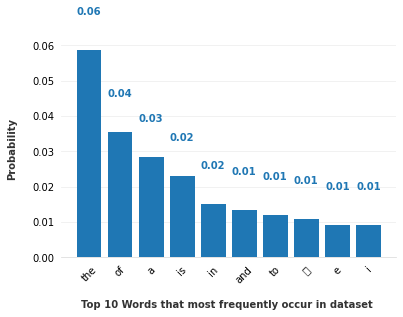

In [39]:
plot_bar_plot(sorted_choices,10,1)

In [40]:
def Bigram_distr(dataset):

  model = defaultdict(lambda: defaultdict(lambda: 0))

  for sentence in dataset:
    sentence = nltk.word_tokenize(sentence)
    for w1, w2 in bigrams(sentence):
      model[w1][w2] += 1

  for w1 in model:
    total_count = float(sum(model[w1].values()))
    for w2 in model[w1]:
      model[w1][w2] /= total_count
  
  return model

In [41]:
Bigram_model = Bigram_distr(ques)

In [42]:
# Bigram_model_dups[w1][w2] gives probabilty w2 next will occur given w1 is there

w1 = 'ray'

cont = dict(Bigram_model[w1])

sorted_choices = sort_dict_by_value(cont)

# sorted_choices

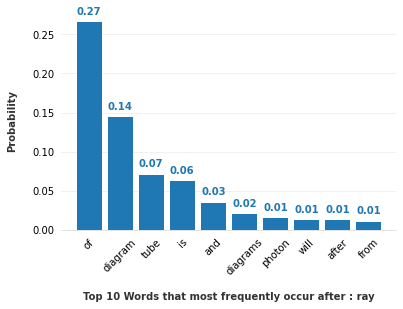

In [43]:
plot_bar_plot(sorted_choices,10,2,w1)

In [44]:
def Trigram_distr(dataset):

  model = defaultdict(lambda: defaultdict(lambda: 0))

  for sentence in dataset:
    sentence = nltk.word_tokenize(sentence)
    for w1,w2,w3 in trigrams(sentence,pad_right=True, pad_left=True):
      model[(w1,w2)][w3] += 1

  for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
      model[w1_w2][w3] /= total_count
  
  return model

In [45]:
Trigram_model = Trigram_distr(ques)

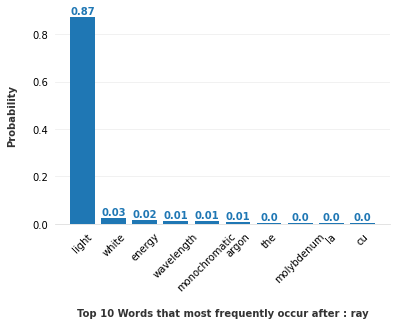

In [46]:
w1 = 'ray'
w2 = 'of'

cont = dict(Trigram_model[(w1,w2)])
sorted_choices = sort_dict_by_value(cont)
plot_bar_plot(sorted_choices,10,3,w1+''+w2)


In [47]:
ques

['total number of species that can be oxidized by acidic permanganate ion mno4 h i fe2 co2 c2o42 s2 so32 no2 po43 so42 ',
 'how many following ammonium salts will evolve n2 gas on heating nh4 2co3 nh4 2cr2o7 nh4no2 nh4clo4 nh4cl nh4 2s nh4 2c2o4 ',
 'there are some species given below i o2 ii co iii b2 iv o2 v no vi he2 vii c22 viii cn ix n2 total number of species which have their fractional bond order ',
 'consider the following compounds 1 h3cf 2 h2cf2 3 ch4 4 h3ccf3 5 ch3c h3 6 c2h4 and calculate value of y x where x is the total number of compounds which have h c h bond angles equal to 109 28 and y is the total number of compounds which have h c h bond angles greater than 109 28 and less than 120 ',
 'find total number of reagents which can produce i2 from ki solution conc h2so4 hg no3 2 solution cuso4 solution conc h3po4 k2cr2o7 h cl2 water pb ch3coo 2 solution ca ocl cl h nano2 dil hcl ',
 'find out maximum number of carbon atom s that can lie in a plane in fedmg2 ',
 'consider 

Now further we are interested in calculating the difference between two unigram distributions: one calculate with the sentences for which there are duplicates.



**Just a observation** : We can append single characters in the questions to words before them since at many places this is an error but do it after doing dictionory thing. Ex : atom s. Never mind not a good idea realised. There are many single letter words thats make sense also like a,variables like x,y,z or Nitrite bond o-n-o.

In [ ]:
drive.flush_and_unmount()